In [52]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lubaroli/notmnist")

print("Path to dataset files:", path)
path = path + "/notMNIST_small"

Path to dataset files: /Users/defeee/.cache/kagglehub/datasets/lubaroli/notmnist/versions/1


In [53]:
# path has folders A-J with images of letters
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import tensorflow as tf


In [54]:
classes = os.listdir(path)

# exclude hidden files
classes = [c for c in classes if not c.startswith('.')]
num_classes = len(classes)

print("There are {} classes: {}".format(num_classes, classes))

There are 10 classes: ['I', 'G', 'A', 'F', 'H', 'J', 'C', 'D', 'E', 'B']


In [55]:
X = []
y = []

for root, _, files in os.walk(path):
    for file in files:
        if file.startswith('.'):
            continue
        image_path = os.path.join(root, file) 
        try:
            img = Image.open(image_path)
            img = img.resize((28, 28))
            img = np.array(img)
            X.append(img)
            y.append(os.path.basename(root))
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            # Remove the problematic file
            os.remove(image_path) 
            print(f"Removed problematic file: {image_path}")

X = np.asarray(X)
y = np.asarray(y)

18724 18724


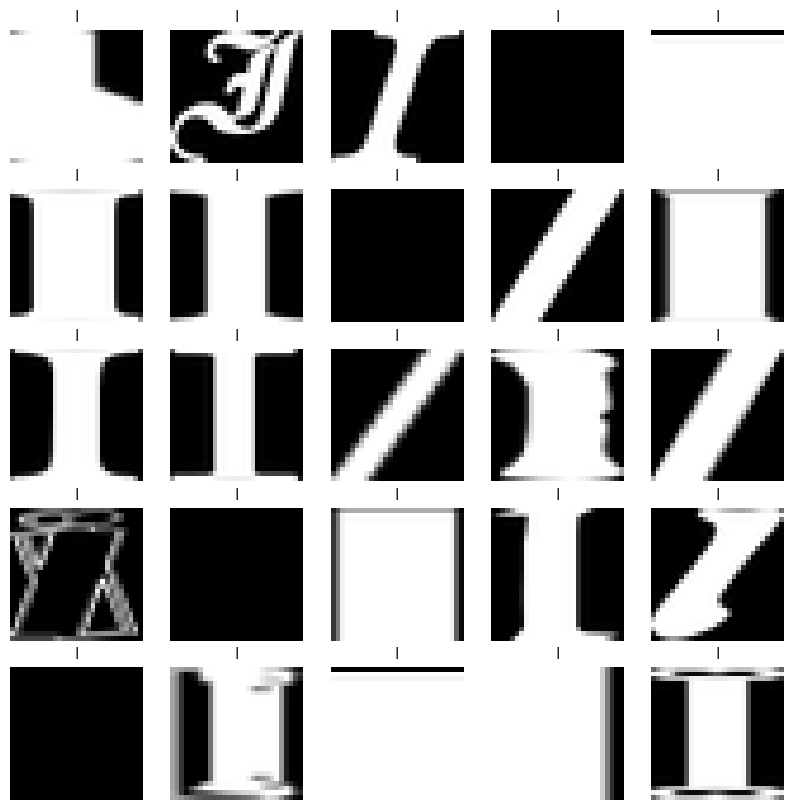

In [56]:
print(len(X), len(y)) 

plt.figure(figsize=(10, 10))
for i in range(min(25, len(X))):  
    plt.subplot(5, 5, i + 1)
    plt.imshow(X[i], cmap='gray')
    plt.axis('off')
    plt.title(y[i])
plt.show()

In [57]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 14979
Testing set size: 3745


In [58]:
input_shape = (28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train / 255.0

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test / 255.0

In [59]:
label_mapping = {label: i for i, label in enumerate(np.unique(y))}

In [60]:
y_train_numeric = np.array([label_mapping[label] for label in y_train])
y_test_numeric = np.array([label_mapping[label] for label in y_test])

In [61]:
num_classes = len(label_mapping)  # Get the total number of classes
y_train = tf.one_hot(y_train_numeric, num_classes)
y_test = tf.one_hot(y_test_numeric, num_classes)

In [62]:
batch_size = 64
num_classes = 10
epochs = 10

In [63]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(28, 28, 1), batch_size=64),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08),
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [64]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (64, 28, 28, 32)       │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (64, 28, 28, 32)       │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (64, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (64, 14, 14, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (64, 14, 14, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (64, 14, 14, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (64, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (64, 7, 7, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (64, 3136)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (64, 512)              │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (64, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (64, 10)               │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,693,162 (6.46 MB)

 Trainable params: 1,693,162 (6.46 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [66]:
history = model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.1,
  callbacks=[callbacks]
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - acc: 0.7066 - loss: 0.9086 - val_acc: 0.9266 - val_loss: 0.2385
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - acc: 0.9234 - loss: 0.2669 - val_acc: 0.9473 - val_loss: 0.1665
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - acc: 0.9389 - loss: 0.1963 - val_acc: 0.9393 - val_loss: 0.1956
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - acc: 0.9490 - loss: 0.1691 - val_acc: 0.9506 - val_loss: 0.1488
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - acc: 0.9536 - loss: 0.1538 - val_acc: 0.9553 - val_loss: 0.1363
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - acc: 0.9577 - loss: 0.1334 - val_acc: 0.9559 - val_loss: 0.1407
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - acc: 0.9652 - loss: 0.1138 - val_acc: 0.9593 - val_loss: 0.1273
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - acc: 0.9716 - loss: 0.0937 - val_acc: 0.9599 - val_loss: 0.1214
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 

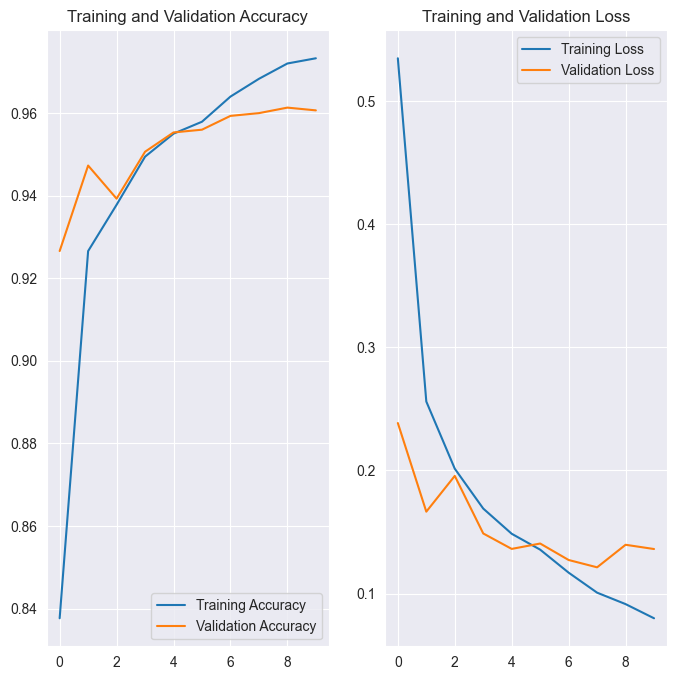

In [67]:
# plot the training and validation accuracy and loss at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [68]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print("Test accuracy:", test_acc)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.9517 - loss: 0.1934
Test accuracy: 0.9543391466140747


In [69]:

# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


<Axes: >

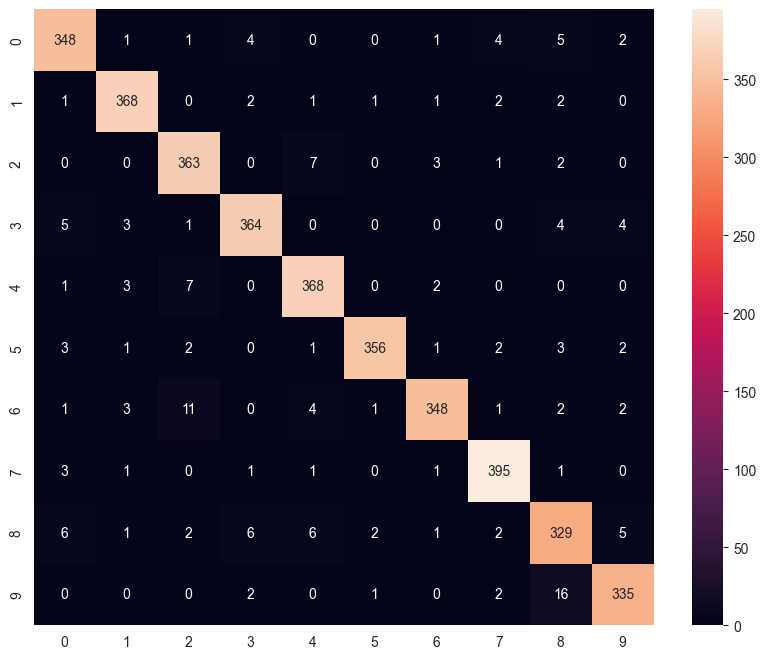

In [70]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [71]:
# implement tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [72]:
model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.1,
  callbacks=[callbacks, tensorboard_callback]
)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - acc: 0.9765 - loss: 0.0760 - val_acc: 0.9653 - val_loss: 0.1394
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - acc: 0.9774 - loss: 0.0678 - val_acc: 0.9606 - val_loss: 0.1355
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - acc: 0.9814 - loss: 0.0565 - val_acc: 0.9586 - val_loss: 0.1645
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - acc: 0.9816 - loss: 0.0551 - val_acc: 0.9619 - val_loss: 0.1583
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - acc: 0.9815 - loss: 0.0586 - val_acc: 0.9626 - val_loss: 0.1420
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 19s 90ms/step - acc: 0.9873 - loss: 0.0416 - val_acc: 0.9573 - val_loss: 0.1650
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 20s 95ms/step - acc: 0.9846 - loss: 0.0459 - val_acc: 0.9573 - val_loss: 0.1695
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 122s 582ms/step - acc: 0.9873 - loss: 0.0375 - val_acc: 0.9593 - val_loss: 0.1768
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━

In [73]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [74]:
# run tensorboard
%tensorboard --logdir logs/fit


Reusing TensorBoard on port 6006 (pid 63377), started 0:36:15 ago. (Use '!kill 63377' to kill it.)